In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import linregress

In [126]:
# Load data
file_path = "columns_final_df.json"
df = pd.read_json(file_path)

In [127]:
# Select data for a specific year, e.g., 2006
year = 2024
df_year = df[df["Year"] == year]

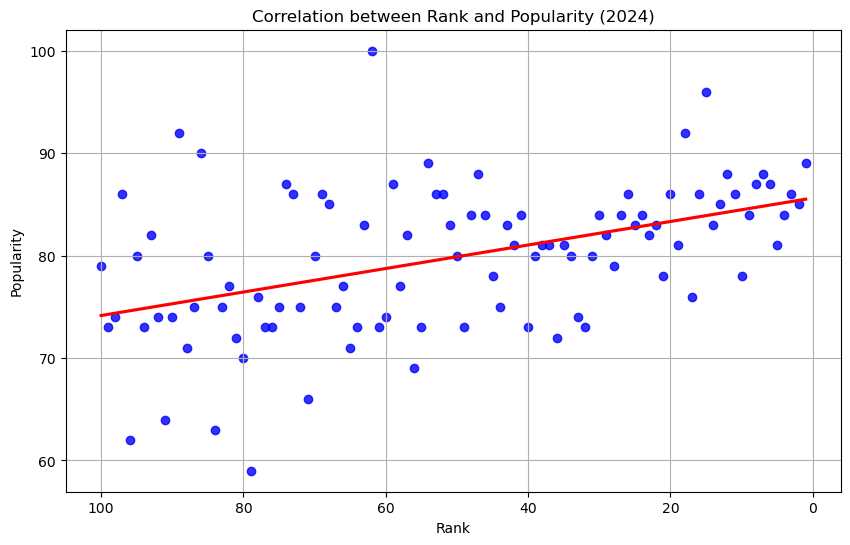

In [128]:
# Scatter plot to visualize correlation
plt.figure(figsize=(10, 6))
sns.regplot(x=df_year["Rank"], y=df_year["Popularity"], scatter=True, color="blue", line_kws={"color": "red"}, ci=None)
plt.xlabel("Rank")
plt.ylabel("Popularity")
plt.title(f"Correlation between Rank and Popularity ({year})")
plt.gca().invert_xaxis()  # Rank 1 should be on the left
plt.grid(True)
plt.show()

In [129]:
# Calculate correlation coefficient
correlation = df_year["Rank"].corr(df_year["Popularity"])
print(f"Correlation coefficient between Rank and Popularity in {year}: {correlation:.2f}")

Correlation coefficient between Rank and Popularity in 2024: -0.46


In [130]:
# Extract relevant columns (Rank and Popularity) for correlation analysis
df_filtered = df[['Rank', 'Popularity']].dropna()

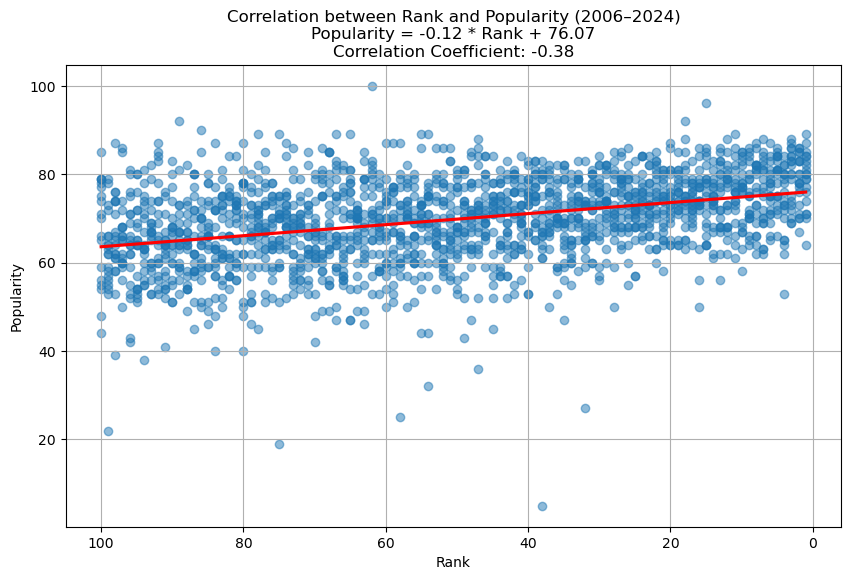

In [131]:
# Calculate correlation coefficient for all years
correlation_all = df_filtered["Rank"].corr(df_filtered["Popularity"])

# Perform linear regression to get equation
slope, intercept, r_value, p_value, std_err = linregress(df_filtered["Rank"], df_filtered["Popularity"])
regression_eq = f"Popularity = {slope:.2f} * Rank + {intercept:.2f}"

# Create scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x=df_filtered['Rank'], y=df_filtered['Popularity'], scatter_kws={'alpha':0.5}, line_kws={"color":"red"}, ci=None)
plt.gca().invert_xaxis()

# Plot labels and title
plt.title(f"Correlation between Rank and Popularity (2006–2024)\n{regression_eq}\nCorrelation Coefficient: {r_value:.2f}")
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [134]:
# Display correlation coefficient
print(f"Regression Equation: {regression_eq}")
print(f"Correlation Coefficient: {r_value:.2f}")

Regression Equation: Popularity = -0.12 * Rank + 76.07
Correlation Coefficient: -0.38
